In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%matplotlib inline

In [3]:
import numpy as np
import scipy.io as sio
import netCDF4 as nc
import glob, os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.colors as mcolors

#Creating red colormap
colors = plt.cm.Reds(np.linspace(0, 1, 256))
colors[0,:]=(1.0, 1.0, 1.0, 1.0)
Red = mcolors.LinearSegmentedColormap.from_list('colormap', colors)

In [4]:
file1 = nc.Dataset('time1z.nc')
file1o= nc.Dataset('time1.nc')
file2 = nc.Dataset('time2z.nc')
file2o= nc.Dataset('time2.nc')
NX = 640
NY = 900
NZ = 120

xq = (file1.variables['xq'][:])
yq = (file1.variables['yq'][:])
xh = (file1.variables['xh'][:])
zl = (file1.variables['z_l'][:])
zi = (file1.variables['z_i'][:])
Time = file1.variables['Time'][:]
Time = np.concatenate((file1.variables['Time'][:],file2.variables['Time'][:]),axis=0)
print(Time.shape)

xqmat=np.tile(xq,(NY,1))
yqmat=np.tile(yq,(NX,1))
yqmat=np.transpose(yqmat)
print(yqmat.shape)
print(xqmat.shape)

(240,)
(900, 640)
(900, 640)


Text(0.5,1,'Concentration')

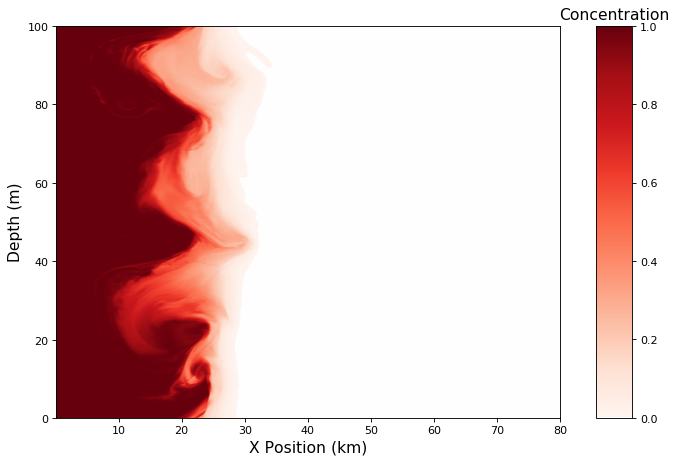

In [5]:
#PLOTTING EXAMPLE
tracer = file1.variables['tr_D1'][119,1,:,:]
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])

quad1 = ax1.pcolormesh(xq,yq,tracer,cmap=Red,vmin=0.0,vmax=1.0,shading='gouraud')
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('X Position (km)',fontsize=14)
ax1.set_ylabel('Depth (m)',fontsize=14)
cb1 = fig.colorbar(quad1,ax2)
plt.title('Concentration', fontsize=14)

In [7]:
def init():
    quad1.set_array([])
    return quad1
def animate(iter):    
    #z = file1.variables['e'][iter,1:121,450,:]
    if 0 <= iter <= 119:
            tracer=file1.variables['tr_D1'][iter,1,:,:]
    if 120 <= iter <=239:    
            tracer=file2.variables['tr_D1'][iter-120,1,:,:]
    #salt = file1.variables['salt'][iter,:,450,:]   
    quad1.set_array(tracer.ravel())
    return quad1
print('done')

done


In [9]:
import matplotlib
matplotlib.rcParams['animation.embed_limit'] =10000000000000000000000000.0

In [8]:
anim = animation.FuncAnimation(fig,animate,frames=238,interval=100,blit=False,repeat=False)
print('done')

done


In [ ]:
HTML(anim.to_jshtml())

In [14]:
anim.save('Videotest.gif', writer='imagemagick')
#cp Videotest.gif /home/eay/  for scp-ing from my local computer!
#matplotlib.rcParams['animation.embed_limit'] =40.0

In [ ]:
print('working')